# Exploration of evolution of prices per m2 per district

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Airbnb evolution over time

In [3]:
airbnb = pd.read_csv('./data/airbnb_dataset.csv')

In [15]:
columns = ['date', 'district', 'n_hosts', 'n_posts', 'n_latlongs', 'n_total']
elements = []
for i, df in airbnb.groupby(['date','neighbourhood_group']):
    n_total = len(df)
    n_latlongs = len(df.drop_duplicates(subset=['latitude', 'longitude']))
    n_posts = len(df.name.unique())
    n_hosts = len(df.host_id.unique())
    date = i[0]
    district = i[1]
    elements.append([date, district, n_hosts, n_posts, n_latlongs, n_total])
airbnb_results = pd.DataFrame(elements, columns=columns)

In [19]:
airbnb_results['datetime'] = pd.to_datetime(airbnb_results.date)

###### Evolution in the number of listings

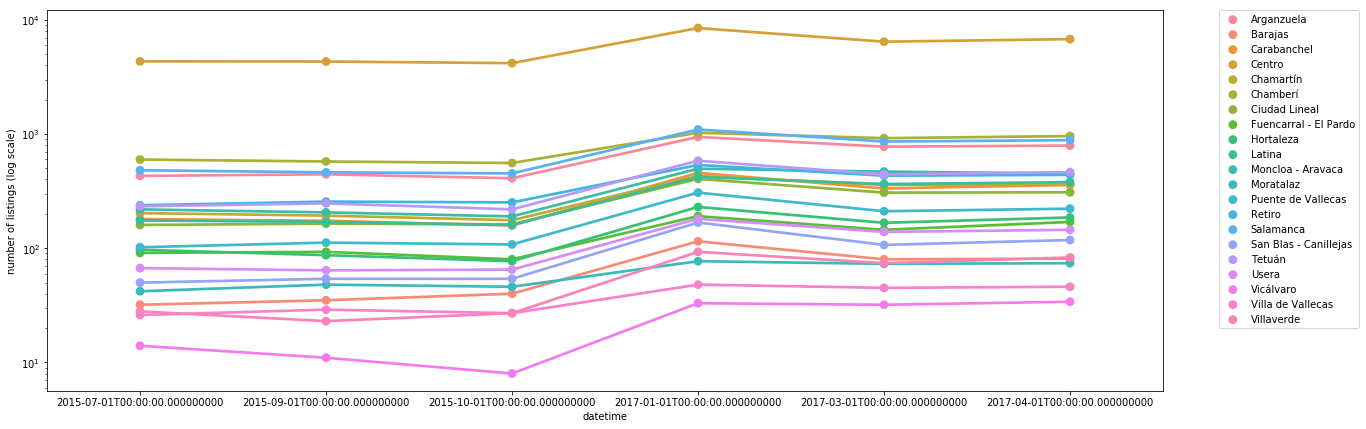

In [29]:
plt.figure(figsize=(20,7))
ax = sns.pointplot(x="datetime", y="n_total", hue="district", data=airbnb_results)
ax.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('number of listings (log scale)')

###### Evolution in the number of locations

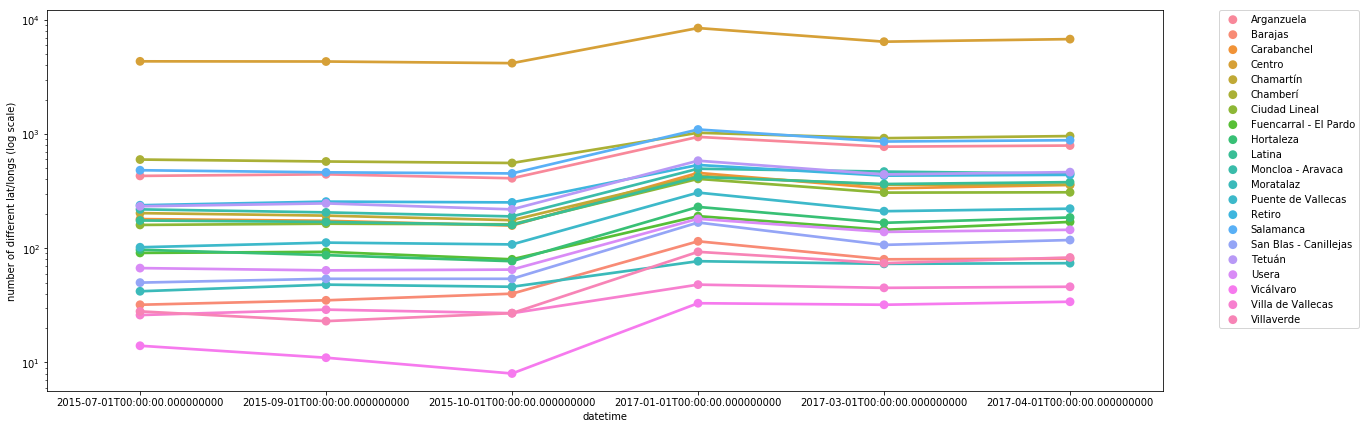

In [30]:
plt.figure(figsize=(20,7))
ax = sns.pointplot(x="datetime", y="n_latlongs", hue="district", data=airbnb_results)
ax.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('number of different lat/longs (log scale)')

###### Evolution in the number of posts

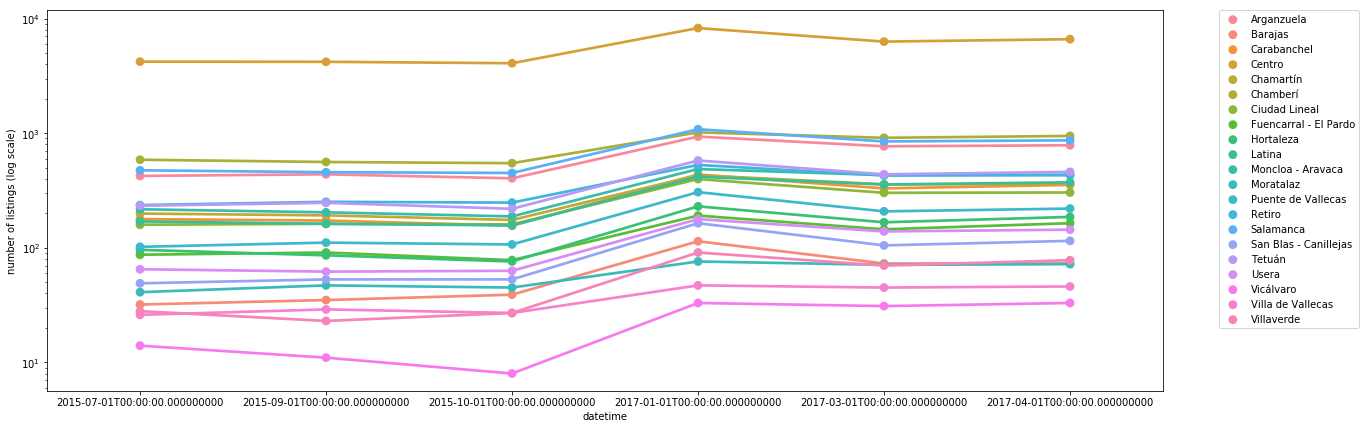

In [31]:
plt.figure(figsize=(20,7))
ax = sns.pointplot(x="datetime", y="n_posts", hue="district", data=airbnb_results)
ax.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('number of listings (log scale)')

###### Evolution in the number of hosts

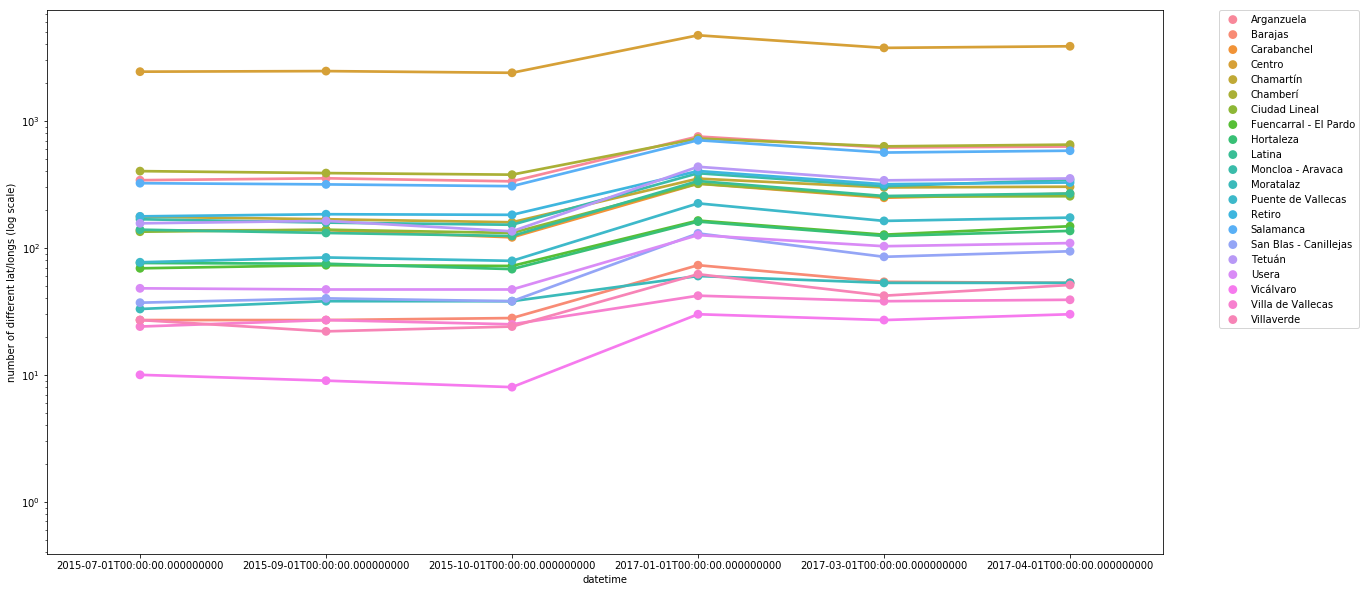

In [45]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(x="datetime", y="n_hosts", hue="district", data=airbnb_results)
ax.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('number of different lat/longs (log scale)')

### 2. Rental prices per m2 evolution over time per district

In [86]:
sale = pd.read_csv('./data/sale_price_m2_districts.csv')
rent = pd.read_csv('./data/rent_price_m2_districts.csv')

# drop vicalvaro since rental data is missing for 2016 and 2017
sale = sale[sale['district'] != 'vicálvaro']
rent = rent[rent['district'] != 'vicálvaro']

sale['price_m2'] = sale['price_m2'].str.split(' ').apply(lambda x: ''.join(x)).str.split('.').apply(lambda x: ''.join(x)).astype(int)
rent['price_m2'] = rent['price_m2'].str.split(' ').apply(lambda x: ''.join(x).replace(',','.')).astype(float)

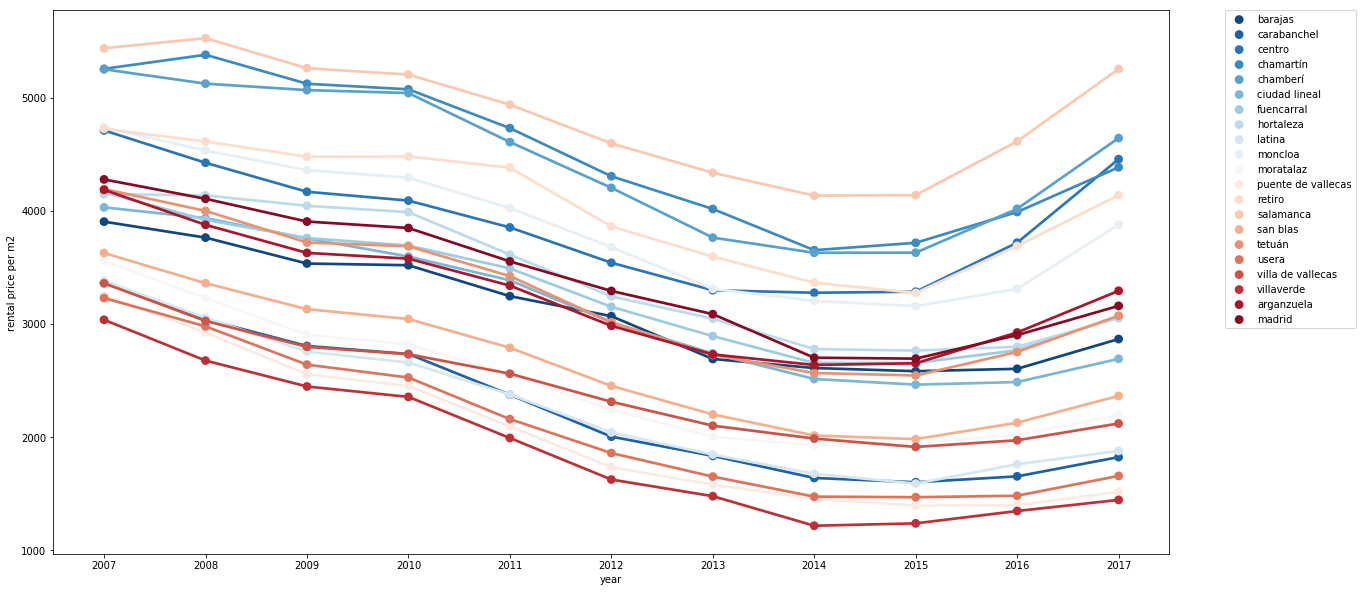

In [91]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(x="year", y="price_m2", hue="district", data=sale, palette="RdBu_r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('rental price per m2')

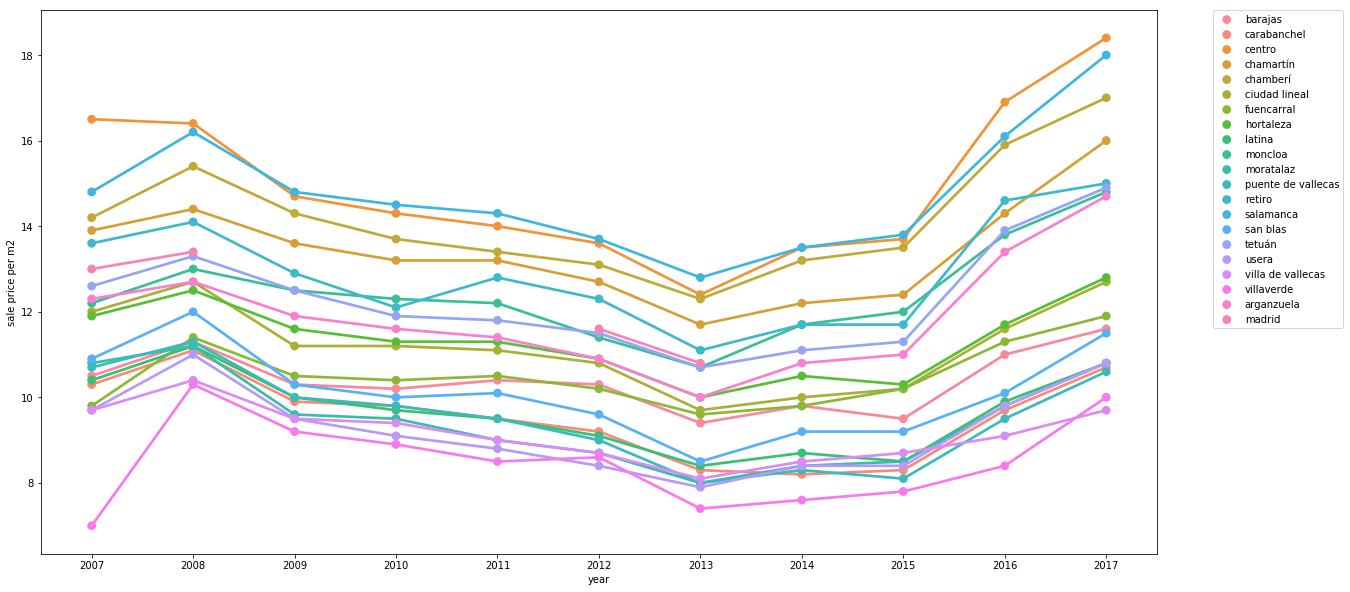

In [90]:
plt.figure(figsize=(20,10))
ax = sns.pointplot(x="year", y="price_m2", hue="district", data=rent)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('sale price per m2')